# $Linear Regression$

理想的函数：

$y = w * x + b$ 

存在噪音：

$y = w * x + b + \epsilon $

$\epsilon \in N(0.01,1)$

优化函数转化为：

$loss = (WX + b - y)^2$

<img src="./images/l3_how_to_opt.png" width=420, heigth=240>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


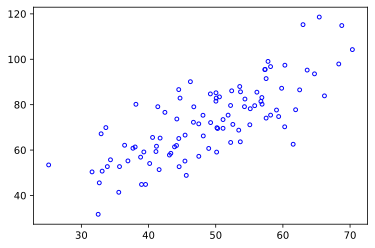

In [2]:
points = np.genfromtxt('./datasets/l3_data.csv',delimiter = ',')
plt.scatter(points[:,0],points[:,1],c = '',edgecolors = 'b',s = 15)

$loss = (WX + b - y)^2 $

In [3]:

# y = wx + b
def compute_error_for_line_given_points(b, w, points):
    """
        计算给定超参数[w,b]的误差值
    """
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (w * x + b)) ** 2
    return totalError / float(len(points))

$b_{new} = b - lr  \frac{\Delta loss}{\Delta b} = b - lr\times 2(WX + b -y) $ 

$w_{new} = w - lr \frac{\Delta loss}{\Delta w} = w - lr\times 2(WX + b -y) X$

In [4]:
def step_gradient(b, w, points, lr):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((w * x) + b))
        w_gradient += -(2/N) * x * (y - ((w * x) + b))
    b_new = b - (lr * b_gradient)
    w_new = w - (lr * w_gradient)
    return [b_new,w_new]

In [5]:
def gradient_descent_runner(points,b,w,lr,iterations):
    """
        梯度下降
    """
    for i in range(iterations):
        b,w = step_gradient(b,w,np.array(points),lr)
        
    return [b,w]

In [6]:
def run():
    points = np.genfromtxt('./datasets/l3_data.csv',delimiter = ',')    
    lr = 0.0001
    initial_b = 0
    initial_w = 0
    iterations = 1000
    print(f"Starting project descent at b = {initial_b}, w = {initial_w},error = {compute_error_for_line_given_points(initial_b,initial_w,points)}")
    print('\nRunning...')
    [b,w] = gradient_descent_runner(points,initial_b,initial_w,lr,iterations)
    print(f"\nAfter project descent at b = {b}, w = {w},error = {compute_error_for_line_given_points(b,w,points)}")
    print('\nb:{}，w:{}'.format(b, w))

In [7]:
if __name__ == '__main__':
    run()

Starting project descent at b = 0, w = 0,error = 5565.107834483211

Running...

After project descent at b = 0.08893651993741346, w = 1.4777440851894448,error = 112.61481011613473

b:0.08893651993741346，w:1.4777440851894448


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


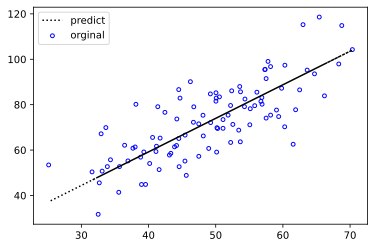

In [8]:
x = points[:,0]
w = 1.4777440851894448
b = 0.08893651993741346
y = w * x + b

plt.scatter(points[:,0],points[:,1],c = '',edgecolors = 'b',s = 15,label = 'orginal')
plt.plot(x,y,c = 'black',label = 'predict',linestyle = ':')
plt.legend()